In [16]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,math
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq, rfftfreq


In [17]:
def gaus(x,A,b,c):
    return A*np.exp( - ( x-b)**2/(2*c**2))

def convgaus(x,A,t0,T,s,offset):
    return A*np.exp(-(x-t0)/T)*np.exp( -(x-t0)**2/(2*s**2)) + offset

def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b

In [39]:
args=np.ones(6)
def gaus_2(x,*p):
    return p[0]*np.exp( - ( x-p[1])**2/(2*p[2]**2))  + p[3]*np.exp( - ( x-p[4])**2/(2*p[5]**2)) 

[-0.71311864  0.20550216 -0.07072108] [1.91249903e-01 1.03944891e-01 9.40150738e-03 2.08172191e+01]
[-0.35893893  0.20576103 -0.07772809] [1.04282765e-01 1.04469232e-01 1.24412992e-02 1.55148288e+01]
[-0.53157309  0.20349653  0.07335019] [1.47136218e-01 1.05095814e-01 8.92073519e-03 1.84766879e+01]
[-0.93517288  0.20408083 -0.06944463] [2.44894781e-01 1.05253461e-01 7.84547548e-03 2.21748426e+01]
[-1.131747    0.2015239  -0.06886018] [2.96085643e-01 1.03996072e-01 6.56734057e-03 2.24169155e+01]
[-2.63879807  0.18864495 -0.06800011] [ 6.81682604e-01  9.92114934e-02 -7.08239250e-03  2.48559378e+01]


Text(0.5, 0.98, 'Measurments for different input strength')

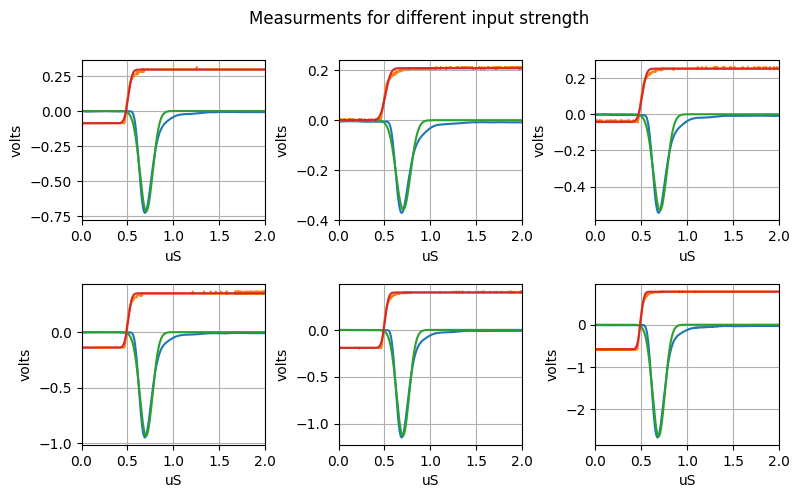

In [26]:
dirlist=glob.glob("data/waveforms/Preamp2_Shaper2_nogain/20240208-000?")

in_amp=[]
in_err=[]
shaper_amp=[]
shaper_err=[]

fig = plt.figure(figsize=([9,5]))
fig.subplots_adjust(hspace=0.4, wspace=0.4)



for i,dir in enumerate(dirlist):


    plt.subplot(2,3,i+1)
    runnumber=dir[-1]
    
    file_list=glob.glob(dir+"/*")
    last_run=file_list[-1]
    f=open(last_run)
    unitstr=f.readlines()[1]
    units=unitstr[:-1].split(",")
    
    cov_A = 1
    cov_C = 1
    cov_avg=1
    if units[1] == "(mV)":
        cov_A = 0.001
    if units[2] == "(mV)":
        cov_C = 0.001
    if units[3] == "(mV)":
        cov_avg = 0.001
    
 


    DF_i=pd.read_csv(last_run,skiprows=[1])
    

    ppot,pcov =curve_fit(gaus  ,DF_i["Time"],DF_i["average(C)"]*cov_avg)
    ppot_in,pcov_in =curve_fit(errfunc ,DF_i["Time"],DF_i["Channel A"]*cov_A)
    
    #time=
    #shaper=
    #input=
    shaper_fit=gaus(DF_i["Time"],ppot[0],ppot[1],ppot[2])
    input_fit=errfunc(DF_i["Time"],ppot_in[0],ppot_in[1],ppot_in[2],ppot_in[3])
    t_o=0.5
    shaper_amp.append(abs(ppot[0]))
    shaper_err.append(pcov_in[0][0])
    in_amp.append(abs(DF_i["Channel A"].max()*cov_A -DF_i["Channel A"].min()*cov_A))

    plt.errorbar(DF_i["Time"]+t_o,DF_i["average(C)"]*cov_avg)
    plt.errorbar(DF_i["Time"]+t_o,DF_i["Channel A"]*cov_A)
    plt.errorbar(DF_i["Time"]+t_o,shaper_fit)
    plt.errorbar(DF_i["Time"]+t_o,input_fit)

    plt.grid("True")
    plt.xlim(0,2)
    plt.xlabel("uS")

    plt.ylabel("volts")

    print(ppot,ppot_in)
fig.suptitle("Measurments for different input strength")
 
#    break





In [19]:
def line(x,m,b):
    return m*x + b

def Poisson(k,lamb):
    return np.exp(-lamb)*lamb**k *(1/math.factorial(k))


In [157]:

p0

[-2.667037, 0.17400003, 0, 0]

[-2.667037, 0.17400003, 0]
[0.1024975  3.06573275 0.19495213 0.1024975  3.06573275 0.19495212] 
 [[inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]]
[-2.667037    0.17400003  0.        ] 
 [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
[-2.667037    0.17400003  0.        ]

	 stdev
0.045584470096705514
0.06835730504577486


c:\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


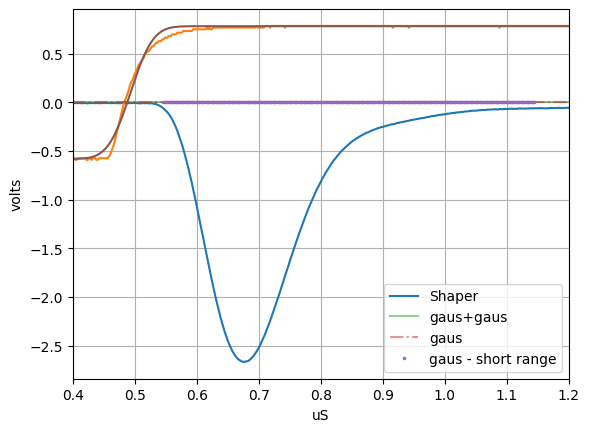

In [159]:
DF_i=pd.read_csv(last_run,skiprows=[1])
#
t1=int(np.max(np.where(DF_i["Time"]<-0.1)))
t2=int(np.max(np.where(DF_i["Time"]<0.8)))
y=DF_i["average(C)"][t1:t2]*cov_avg
x=DF_i["Time"][t1:t2]

p0=[np.min(y),x.iloc[np.where(y==np.min(y))[0][0] ],0]
print(p0)



ppot,pcov =curve_fit(gaus_2 ,x,y,p0=args)
ppot1,pcov1 =curve_fit(gaus ,x,y, p0=p0)

p0_guas=ppot1

yy=np.array(y)
yloc= int(np.average(np.where(yy - ppot[0] < 0.0002)))

new_limits=[yloc-150,yloc+150]

shrt_x= x[new_limits[0]:new_limits[1]]
shrt_y=y[new_limits[0]:new_limits[1]]*cov_avg

ppot_new,pcov_new =curve_fit(gaus ,shrt_x,shrt_y, p0=ppot1, maxfev=10000)




ppot_in,pcov_in =curve_fit(errfunc ,DF_i["Time"],DF_i["Channel A"]*cov_A)

print(ppot,"\n",pcov)

print(ppot1,"\n",pcov1)

print(ppot_new)
#possion_par=curve_fit(Poisson  ,DF_i["Time"],DF_i["average(C)"])

#time=
#shaper=
#input=
shaper_fit2=gaus_2(x,*ppot)
shaper_fit1=gaus(x,ppot1[0],ppot1[1],ppot1[2])
shaper_new=gaus(shrt_x,ppot_new[0],ppot_new[1],ppot_new[2])
#shaper_fit_possion=gaus(DF_i["Time"],possion_par[0])

input_fit=errfunc(DF_i["Time"],ppot_in[0],ppot_in[1],ppot_in[2],ppot_in[3])
t_o=0.5
shaper_amp.append(abs(ppot[0]))
shaper_err.append(pcov_in[0][0])

in_amp.append(abs(DF_i["Channel A"].max()*cov_A -DF_i["Channel A"].min()*cov_A))
#DF_i["Time"]+t_o,DF_i["average(C)"]*cov_avg,
plt.errorbar(x+t_o,y, label="Shaper")
plt.errorbar(DF_i["Time"]+t_o,DF_i["Channel A"]*cov_A)
plt.errorbar(x+t_o,shaper_fit2,label="gaus+gaus",alpha=.5)
plt.errorbar(x+t_o,shaper_fit1,label="gaus",fmt="-.",alpha=.5)
plt.errorbar(shrt_x+t_o,shaper_new,label="gaus - short range",fmt=".",ms=3)
#plt.errorbar(DF_i["Time"]+t_o,shaper_fit_possion,label="pos")


stdev1= np.sqrt(np.sum( (y - shaper_fit1)**2  )) / len(y)
stdev2= np.sqrt(np.sum( (shrt_y -shaper_new )**2  )) / len(shaper_new)


print("\n\t stdev")
print(stdev1)
print(stdev2)

plt.errorbar(DF_i["Time"]+t_o,input_fit)


plt.grid("True")
plt.xlim(0.4,1.2)
plt.xlabel("uS")

plt.ylabel("volts")

plt.legend()


[ 1.96866403 -0.0684758 ]


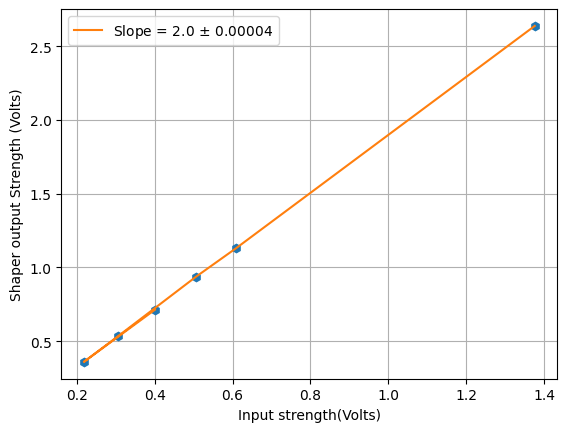

In [123]:
plt.errorbar(x=in_amp,y=(shaper_amp),yerr=shaper_err,fmt="h")

ppot,pcov  = curve_fit(line,in_amp, shaper_amp)
print(ppot)
yfit=line(np.array(in_amp),ppot[0],ppot[1])



plt.errorbar(x=in_amp,y=(shaper_amp),label = "Slope = %.1f $\pm$ %0.5f "%(ppot[0],pcov[0][0]))


plt.grid("True")
plt.xlabel("Input strength(Volts)")
plt.ylabel("Shaper output Strength (Volts)")
plt.legend()



In [132]:
 sum((abs(yfit-shaper_amp)))**2/6

6.340136304220407e-05

In [43]:
ppot

array([-2.63879807,  0.18864495, -0.06800011])

[-2.667037, 0.17400003, 0]

	 stdev
0.045584470096705514
0.06835730504577486


c:\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


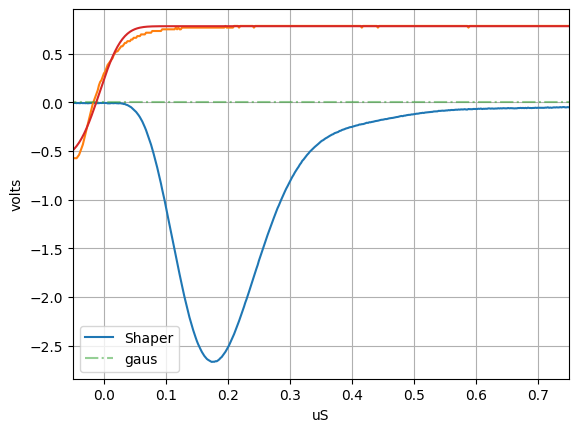

In [164]:
DF_i=pd.read_csv(last_run,skiprows=[1])
#
t1=int(np.max(np.where(DF_i["Time"]<-0.1)))
t2=int(np.max(np.where(DF_i["Time"]<0.8)))
y=DF_i["average(C)"][t1:t2]*cov_avg
x=DF_i["Time"][t1:t2]

p0=[np.min(y),x.iloc[np.where(y==np.min(y))[0][0] ],0]
print(p0)




ppot,pcov =curve_fit(gaus ,x,y, p0=p0)

yy=np.array(y)
#yloc= int(np.average(np.where(yy - ppot[0] < 0.0002)))

#new_limits=[yloc-150,yloc+150]

#shrt_x= x[new_limits[0]:new_limits[1]]
#shrt_y=y[new_limits[0]:new_limits[1]]*cov_avg

#ppot_new,pcov_new =curve_fit(gaus ,shrt_x,shrt_y, p0=ppot1, maxfev=10000)




ppot_in,pcov_in =curve_fit(errfunc ,DF_i["Time"],DF_i["Channel A"]*cov_A)

shaper_fit_guas=gaus(x,ppot[0],ppot[1],ppot[2])
#shaper_new=gaus(shrt_x,ppot_new[0],ppot_new[1],ppot_new[2])
#shaper_fit_possion=gaus(DF_i["Time"],possion_par[0])

input_fit=errfunc(DF_i["Time"],ppot_in[0],ppot_in[1],ppot_in[2],ppot_in[3])
t_o=0.0


#DF_i["Time"]+t_o,DF_i["average(C)"]*cov_avg,
plt.errorbar(x+t_o,y, label="Shaper")
plt.errorbar(DF_i["Time"]+t_o,DF_i["Channel A"]*cov_A)
#plt.errorbar(x+t_o,shaper_fit2,label="gaus+gaus",alpha=.5)
plt.errorbar(x+t_o,shaper_fit,label="gaus",fmt="-.",alpha=.5)
#plt.errorbar(shrt_x+t_o,shaper_new,label="gaus - short range",fmt=".",ms=3)
#plt.errorbar(DF_i["Time"]+t_o,shaper_fit_possion,label="pos")


stdev1= np.sqrt(np.sum( (y - shaper_fit)**2  )) / len(y)
stdev2= np.sqrt(np.sum( (shrt_y -shaper_new )**2  )) / len(shaper_new)


print("\n\t stdev")
print(stdev1)
print(stdev2)

plt.errorbar(DF_i["Time"]+t_o,input_fit)


plt.grid("True")
plt.xlim(-0.05,0.75)
plt.xlabel("uS")

plt.ylabel("volts")

plt.legend()
